In [3]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
from matplotlib import cm
from matplotlib.colors import Normalize
matplotlib.rcParams["figure.figsize"] = (20,10)

In [4]:
df1 = pd.read_csv("/Users/paul/Downloads/archive (1)/full_2023.csv")
df1.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (10,12,14,17,18,20,22,26,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2023-1,2023-01-05,1,Vente,1070000.0,184.0,NaN,ALL DES HETRES,0124,1630.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.019949,46.247458
1,2023-1,2023-01-05,1,Vente,1070000.0,159.0,NaN,ALL DES HETRES,0124,1630.0,...,Dépendance,NaN,0.0,NaN,NaN,NaN,NaN,NaN,6.020204,46.247228
2,2023-1,2023-01-05,1,Vente,1070000.0,159.0,NaN,ALL DES HETRES,0124,1630.0,...,Appartement,233.0,8.0,NaN,NaN,NaN,NaN,NaN,6.020204,46.247228
3,2023-2,2023-01-03,1,Vente,152200.0,2914.0,NaN,RTE DE PONCIN,0107,1450.0,...,Maison,64.0,3.0,S,sols,NaN,NaN,988.0,5.438273,46.129859
4,2023-3,2023-01-05,1,Vente,269000.0,427.0,T,CHE DE L'AUBEPIN,0040,1800.0,...,Dépendance,NaN,0.0,S,sols,NaN,NaN,835.0,5.225844,45.853513


In [5]:
df_dropped = df1.drop(["id_mutation","date_mutation", "code_departement", "code_commune", "ancien_code_commune", "numero_disposition", "ancien_nom_commune", "lot5_numero", "lot5_surface_carrez", "nombre_lots", "code_type_local", "adresse_suffixe", "adresse_code_voie", "code_nature_culture", "nature_culture", "id_parcelle", "ancien_id_parcelle", "numero_volume", "lot1_numero","lot2_numero", "lot3_numero", "lot4_numero", "lot3_surface_carrez", "lot1_surface_carrez", "lot2_surface_carrez", "lot4_surface_carrez", "lot5_surface_carrez", "code_nature_culture_speciale", "nature_culture_speciale"], axis = 'columns')

In [6]:
df_dropped.head()

,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude
0,Vente,1070000.0,184.0,ALL DES HETRES,1630.0,Saint-Genis-Pouilly,Dépendance,NaN,0.0,NaN,6.019949,46.247458
1,Vente,1070000.0,159.0,ALL DES HETRES,1630.0,Saint-Genis-Pouilly,Dépendance,NaN,0.0,NaN,6.020204,46.247228
2,Vente,1070000.0,159.0,ALL DES HETRES,1630.0,Saint-Genis-Pouilly,Appartement,233.0,8.0,NaN,6.020204,46.247228
3,Vente,152200.0,2914.0,RTE DE PONCIN,1450.0,Serrières-sur-Ain,Maison,64.0,3.0,988.0,5.438273,46.129859
4,Vente,269000.0,427.0,CHE DE L'AUBEPIN,1800.0,Saint-Jean-de-Niost,Dépendance,NaN,0.0,835.0,5.225844,45.853513


In [7]:
#Cleaning the data to only sales of properties in Paris
paris_postal_codes = ["75001","75002","75003","75004","75005","75006","75007","75008","75009","75010","75011","75012","75013","75014","75015","75016","75017","75018","75019","75020"]

In [8]:
#Returning the number of rows left
df_cleaned = df_dropped[
    df_dropped['code_postal']
    .astype(str)        # Ensure the column is treated as a string
    .str.strip()        # Remove leading/trailing spaces
    .str.split('.').str[0]  # Handle float-like entries (e.g., '75001.0')
    .isin(paris_postal_codes)  # Check against the Paris postal codes
    & (df1['nature_mutation'] == "Vente")
    & (df1['type_local'].isin(["Appartement", "Maison"]))
]
df_cleaned.shape

(17664, 12)

In [9]:
#Checking the different area codes retained
print(df_cleaned['code_postal'].unique())

[75015. 75016. 75017. 75009. 75018. 75020. 75008. 75010. 75019. 75003.
 75002. 75001. 75004. 75011. 75014. 75013. 75005. 75006. 75007. 75012.]


In [10]:
#Checking if we have any NA rows
df_cleaned.isnull().sum()

nature_mutation                  0
valeur_fonciere                215
adresse_numero                   1
adresse_nom_voie                 0
code_postal                      0
nom_commune                      0
type_local                       0
surface_reelle_bati              0
nombre_pieces_principales        0
surface_terrain              16736
longitude                        2
latitude                         2
dtype: int64

In [11]:
#Dropping rows with NA 
df2 = df_cleaned.dropna(subset=["valeur_fonciere", "adresse_numero", "longitude", "latitude"])
df2.isnull().sum()
df2.shape

(17446, 12)

In [12]:
#Saving the cleaned file as a new CSV
df2.to_csv("/Users/paul/Downloads/full_2023_cleaned.csv", index=False)

In [13]:
#Number of recorded sales by postal code
df2.groupby('code_postal')['code_postal'].agg('count')

code_postal
75001.0     228
75002.0     299
75003.0     453
75004.0     274
75005.0     547
75006.0     453
75007.0     533
75008.0     384
75009.0     594
75010.0     989
75011.0    1364
75012.0    1000
75013.0     825
75014.0     982
75015.0    1775
75016.0    1493
75017.0    1452
75018.0    1775
75019.0     986
75020.0    1040
Name: code_postal, dtype: int64

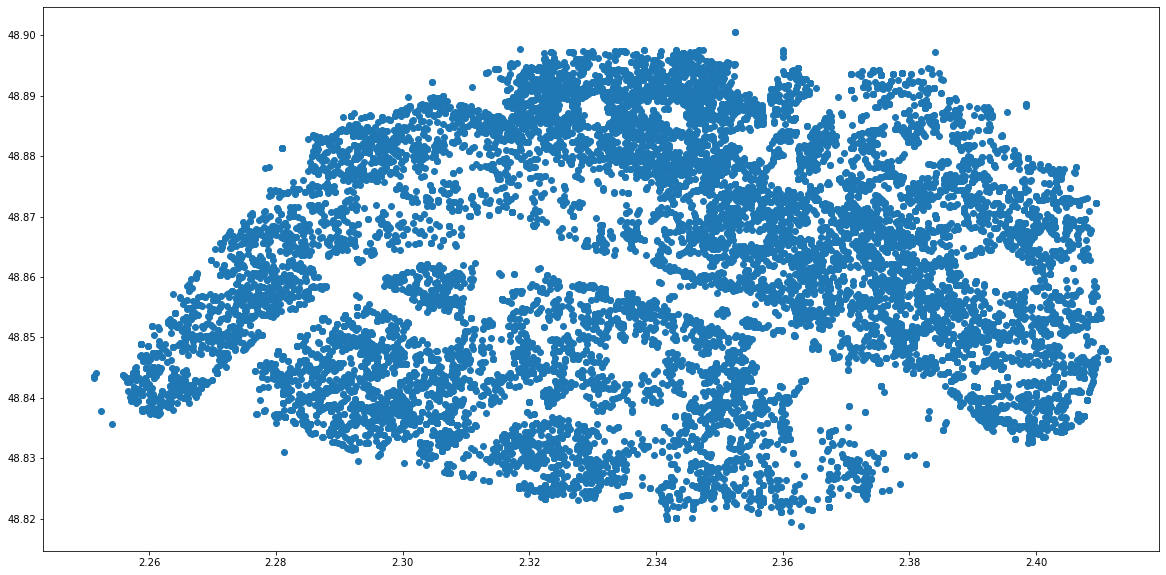

In [14]:
#Plotting a map of Paris with the coordinates of the data points
plt.scatter(df_cleaned["longitude"],df_cleaned["latitude"])

In [15]:
#Finding the most expensive transaction location and the value
most_expensive_location = df_cleaned["valeur_fonciere"].idxmax()
most_expensive_address = print(df_cleaned["adresse_numero"][most_expensive_location], df_cleaned["adresse_nom_voie"][most_expensive_location], df_cleaned["valeur_fonciere"][most_expensive_location])
most_expensive_address

21.0 RUE VERNET 157200000.0


In [16]:
#Adding a column for the price per m2 for the transaction
df3 = df2.copy()
df3['m2_price'] = df3["valeur_fonciere"] / df3["surface_reelle_bati"]

In [17]:
df3.head()

,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,m2_price
1408768,Vente,250000.0,10.0,RUE D ORADOUR SUR GLANE,75015.0,Issy-les-Moulineaux,Appartement,28.0,1.0,NaN,2.281291,48.830957,8928.571429
1412948,Vente,339550.0,26.0,RUE NUNGESSER ET COLI,75016.0,Boulogne-Billancourt,Appartement,29.0,1.0,NaN,2.251240,48.843262,11708.620690
1415312,Vente,133000.0,14.0,RUE NUNGESSER ET COLI,75016.0,Boulogne-Billancourt,Appartement,16.0,1.0,NaN,2.251630,48.844178,8312.500000
1419300,Vente,1000000.0,20.0,RUE NUNGESSER ET COLI,75016.0,Boulogne-Billancourt,Appartement,68.0,2.0,NaN,2.251365,48.843634,14705.882353
1419978,Vente,357000.0,13.0,AV FERDINAND BUISSON,75016.0,Boulogne-Billancourt,Appartement,34.0,2.0,NaN,2.254116,48.835670,10500.000000


In [18]:
# Create a dictionary mapping code_postal to average price per m²
average_price_dict = {
    "75001": 13550, "75002": 11830, "75003": 12750, "75004": 13080, "75005": 12000,
    "75006": 13840, "75007": 13190, "75008": 11230, "75009": 10120, "75010": 9330,
    "75011": 9740, "75012": 8670, "75013": 8340, "75014": 9140, "75015": 9170,
    "75016": 10440, "75017": 9570, "75018": 8780, "75019": 7930, "75020": 8190
}

In [19]:
#Cleaning the postal code column
df3["code_postal"] = df3["code_postal"].astype(str).str.split('.').str[0]
print(df3["code_postal"].unique())

['75015' '75016' '75017' '75009' '75018' '75020' '75008' '75010' '75019'
 '75003' '75002' '75001' '75004' '75011' '75014' '75013' '75005' '75006'
 '75007' '75012']


In [20]:
#Mapping the average m2 price based on the properties district
df3["average_m2_price_district"] = df3["code_postal"].map(average_price_dict)
df3.head()

,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,m2_price,average_m2_price_district
1408768,Vente,250000.0,10.0,RUE D ORADOUR SUR GLANE,75015,Issy-les-Moulineaux,Appartement,28.0,1.0,NaN,2.281291,48.830957,8928.571429,9170
1412948,Vente,339550.0,26.0,RUE NUNGESSER ET COLI,75016,Boulogne-Billancourt,Appartement,29.0,1.0,NaN,2.251240,48.843262,11708.620690,10440
1415312,Vente,133000.0,14.0,RUE NUNGESSER ET COLI,75016,Boulogne-Billancourt,Appartement,16.0,1.0,NaN,2.251630,48.844178,8312.500000,10440
1419300,Vente,1000000.0,20.0,RUE NUNGESSER ET COLI,75016,Boulogne-Billancourt,Appartement,68.0,2.0,NaN,2.251365,48.843634,14705.882353,10440
1419978,Vente,357000.0,13.0,AV FERDINAND BUISSON,75016,Boulogne-Billancourt,Appartement,34.0,2.0,NaN,2.254116,48.835670,10500.000000,10440


In [21]:
#Checking if the price per m2 is within a range
df3["lower_bound"] = df3["average_m2_price_district"]*0.75
df3["higher_bound"] = df3["average_m2_price_district"]*1.25
df3["is_within_range"] = ((df3["m2_price"] >= df3["lower_bound"]) & (df3["m2_price"] <= df3["higher_bound"]))
df3.head()

,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,m2_price,average_m2_price_district,lower_bound,higher_bound,is_within_range
1408768,Vente,250000.0,10.0,RUE D ORADOUR SUR GLANE,75015,Issy-les-Moulineaux,Appartement,28.0,1.0,NaN,2.281291,48.830957,8928.571429,9170,6877.5,11462.5,True
1412948,Vente,339550.0,26.0,RUE NUNGESSER ET COLI,75016,Boulogne-Billancourt,Appartement,29.0,1.0,NaN,2.251240,48.843262,11708.620690,10440,7830.0,13050.0,True
1415312,Vente,133000.0,14.0,RUE NUNGESSER ET COLI,75016,Boulogne-Billancourt,Appartement,16.0,1.0,NaN,2.251630,48.844178,8312.500000,10440,7830.0,13050.0,True
1419300,Vente,1000000.0,20.0,RUE NUNGESSER ET COLI,75016,Boulogne-Billancourt,Appartement,68.0,2.0,NaN,2.251365,48.843634,14705.882353,10440,7830.0,13050.0,False
1419978,Vente,357000.0,13.0,AV FERDINAND BUISSON,75016,Boulogne-Billancourt,Appartement,34.0,2.0,NaN,2.254116,48.835670,10500.000000,10440,7830.0,13050.0,True


In [22]:
#Checking how many values are within/without the range
df3.groupby('is_within_range')['is_within_range'].agg('count')

is_within_range
False     7158
True     10288
Name: is_within_range, dtype: int64

In [23]:
#Creating a new data frame with only the sales with a reasonable price per m2
df4 = df3[df3["is_within_range"]]

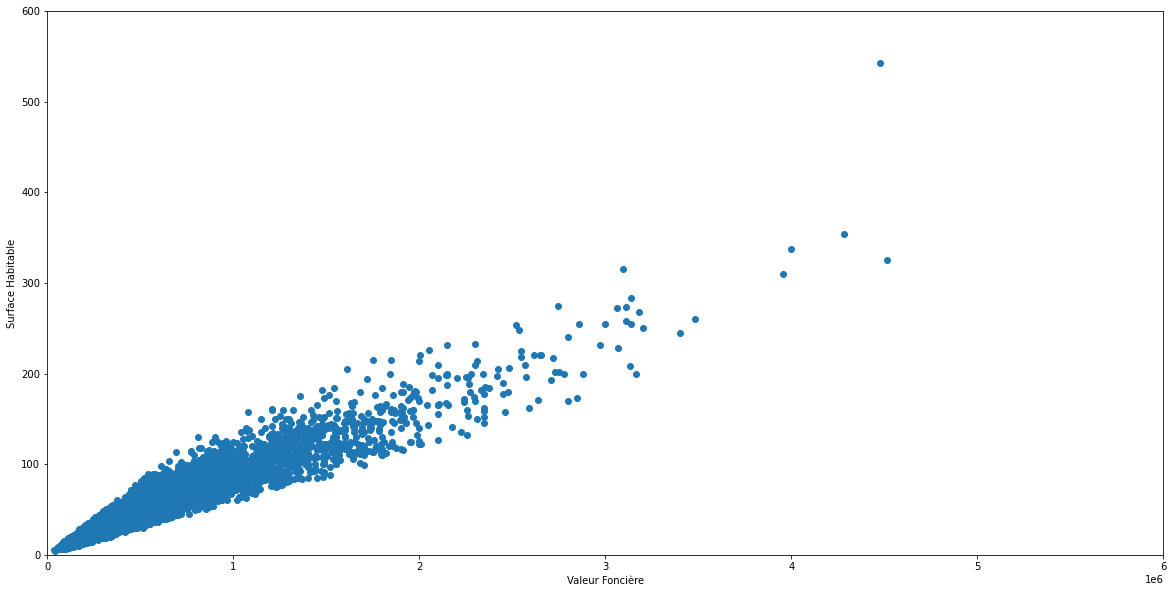

In [24]:
#Plotting the Property Price based on it's squared meter space
plt.scatter(df4["valeur_fonciere"], df4["surface_reelle_bati"])
plt.xlim (0, 6000000)
plt.ylim(0, 600)
plt.xlabel("Valeur Foncière")
plt.ylabel("Surface Habitable")
plt.show()

Text(0, 0.5, 'Count')

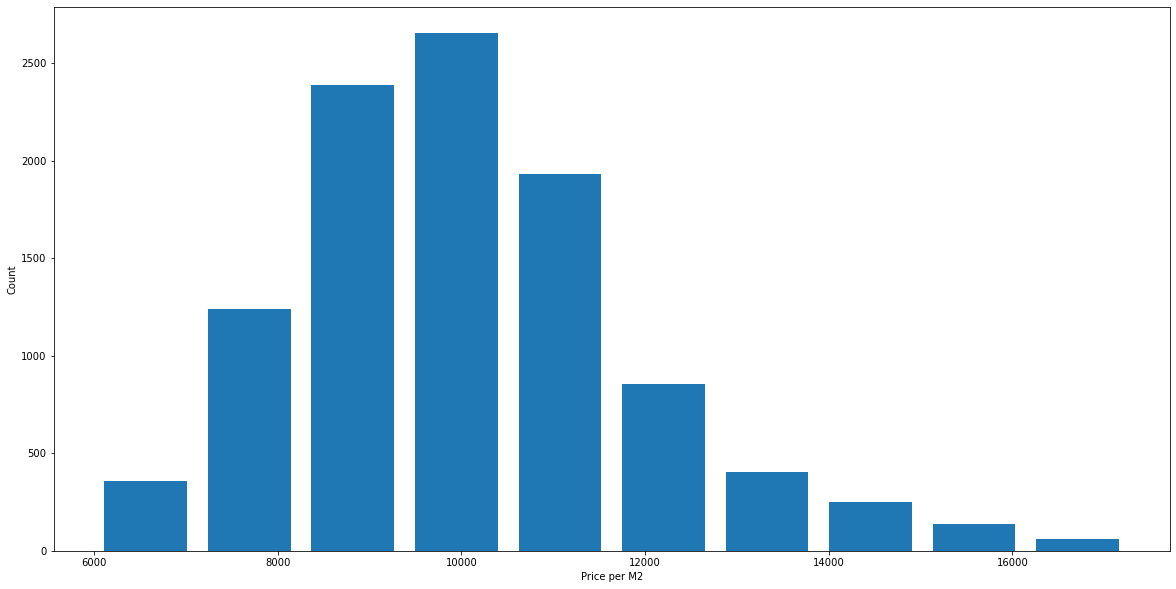

In [25]:
#Plotting the distribution of M2 price
plt.hist(df4.m2_price, rwidth = 0.8)
plt.xlabel("Price per M2")
plt.ylabel("Count")

In [26]:
cheapest_m2price = df4["m2_price"].idxmin()
print(df4.loc[cheapest_m2price])

nature_mutation                                 Vente
valeur_fonciere                              120000.0
adresse_numero                                    4.0
adresse_nom_voie                          IMP GRIMAUD
code_postal                                     75019
nom_commune                  Paris 19e Arrondissement
type_local                                Appartement
surface_reelle_bati                              20.0
nombre_pieces_principales                         1.0
surface_terrain                                   NaN
longitude                                    2.388942
latitude                                    48.881815
m2_price                                       6000.0
average_m2_price_district                        7930
lower_bound                                    5947.5
higher_bound                                   9912.5
is_within_range                                  True
Name: 1509108, dtype: object


In [27]:
expensive_m2price = df4["m2_price"].idxmax()
print(df4.loc[expensive_m2price])

nature_mutation                                Vente
valeur_fonciere                            1520000.0
adresse_numero                                  23.0
adresse_nom_voie                           RUE MAYET
code_postal                                    75006
nom_commune                  Paris 6e Arrondissement
type_local                               Appartement
surface_reelle_bati                             88.0
nombre_pieces_principales                        4.0
surface_terrain                                  NaN
longitude                                   2.319608
latitude                                   48.846226
m2_price                                17272.727273
average_m2_price_district                      13840
lower_bound                                  10380.0
higher_bound                                 17300.0
is_within_range                                 True
Name: 1514006, dtype: object


In [28]:
dummies = pd.get_dummies(df4.type_local)

In [29]:
df5 = pd.concat([df4, dummies], axis = 'columns')
df5.head()

,nature_mutation,valeur_fonciere,adresse_numero,adresse_nom_voie,code_postal,nom_commune,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,m2_price,average_m2_price_district,lower_bound,higher_bound,is_within_range,Appartement,Maison
1408768,Vente,250000.0,10.0,RUE D ORADOUR SUR GLANE,75015,Issy-les-Moulineaux,Appartement,28.0,1.0,NaN,2.281291,48.830957,8928.571429,9170,6877.5,11462.5,True,1,0
1412948,Vente,339550.0,26.0,RUE NUNGESSER ET COLI,75016,Boulogne-Billancourt,Appartement,29.0,1.0,NaN,2.251240,48.843262,11708.620690,10440,7830.0,13050.0,True,1,0
1415312,Vente,133000.0,14.0,RUE NUNGESSER ET COLI,75016,Boulogne-Billancourt,Appartement,16.0,1.0,NaN,2.251630,48.844178,8312.500000,10440,7830.0,13050.0,True,1,0
1419978,Vente,357000.0,13.0,AV FERDINAND BUISSON,75016,Boulogne-Billancourt,Appartement,34.0,2.0,NaN,2.254116,48.835670,10500.000000,10440,7830.0,13050.0,True,1,0
1422184,Vente,695000.0,35.0,AV FERDINAND BUISSON,75016,Boulogne-Billancourt,Appartement,86.0,5.0,NaN,2.252431,48.837737,8081.395349,10440,7830.0,13050.0,True,1,0


In [30]:
#Preparing data to train the model
X = df5.drop(['valeur_fonciere', 'nature_mutation', 'adresse_nom_voie', 'nom_commune', 'type_local', 'surface_terrain', 'm2_price', 'average_m2_price_district', 'lower_bound', 'higher_bound', 'is_within_range'],  axis = 'columns')
X.head()

,adresse_numero,code_postal,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,Appartement,Maison
1408768,10.0,75015,28.0,1.0,2.281291,48.830957,1,0
1412948,26.0,75016,29.0,1.0,2.251240,48.843262,1,0
1415312,14.0,75016,16.0,1.0,2.251630,48.844178,1,0
1419978,13.0,75016,34.0,2.0,2.254116,48.835670,1,0
1422184,35.0,75016,86.0,5.0,2.252431,48.837737,1,0


In [31]:
Y = df5.valeur_fonciere
Y.head()

1408768    250000.0
1412948    339550.0
1415312    133000.0
1419978    357000.0
1422184    695000.0
Name: valeur_fonciere, dtype: float64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [33]:
#Trying Linear Regression's accuracy
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)
lr_clf.score(X_test,Y_test)

0.9362270763497945

In [34]:
#Creating 5 folds to check the variability of the cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.93665749, 0.93995106, 0.93186914, 0.93470568, 0.92364767])

In [35]:
#Finding the best model with the best parameters
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,Y):
    algos = {
        'linear_regression' :{
            'model': LinearRegression(),
            'params':{
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,Y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
        
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,Y)

,model,best_score,best_params
0,linear_regression,0.933366,{'normalize': False}
1,lasso,0.933366,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.920658,"{'criterion': 'mse', 'splitter': 'random'}"


In [36]:
X.columns

Index(['adresse_numero', 'code_postal', 'surface_reelle_bati',
       'nombre_pieces_principales', 'longitude', 'latitude', 'Appartement',
       'Maison'],
      dtype='object')

In [37]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

def get_coordinates(address):
    geolocator = Nominatim(user_agent="property_price_estimator")  # Custom user-agent
    try:
        location = geolocator.geocode(address, timeout=10)  # Fetch coordinates
        if location:
            return location.latitude, location.longitude
        else:
            print("Address not found.")
            return None, None
    except GeocoderTimedOut:
        print("Geocoder service timed out.")
        return None, None


In [38]:
def predict_price(adresse_numero, adresse_nom_voie, code_postal, surface_reelle_bati, nombre_pieces_principales, type_local, floor_level, condition):
    # Construct full address (including "Paris" to avoid confusion)
    full_address = f"{adresse_numero} {adresse_nom_voie}, {code_postal} Paris, France"
    
    # Get latitude & longitude
    latitude, longitude = get_coordinates(full_address)
    
    if latitude is None or longitude is None:
        print("Could not determine coordinates. Please check the address.")
        return None

    # Prepare feature array
    x = np.zeros(len(X.columns))
    x[0] = adresse_numero
    x[1] = code_postal
    x[2] = surface_reelle_bati
    x[3] = nombre_pieces_principales
    x[4] = longitude  # Add longitude
    x[5] = latitude   # Add latitude

    if "Appartement" in X.columns:
        x[X.columns.get_loc("Appartement")] = 1 if type_local == "Appartement" else 0
    if "Maison" in X.columns:
        x[X.columns.get_loc("Maison")] = 1 if type_local == "Maison" else 0
            
    # Make prediction
    base_price = lr_clf.predict([x])[0]
        
    floor_coefficients = {
        "Ground floor" : 0.9,
        "1st to 3rd" : 1.0,
        "4th to 5th" : 1.1,
        "6th+" : 1.15,
    }
    
    floor_factor = floor_coefficients.get(floor_level, 1.00)
    
    condition_coefficients = {
        "Need renovation" : 0.9,
        "Good condition" : 1.00,
        "Renovated" : 1.15,
        "Luxury Renovation" : 1.25,
    }
    
    condition_factor = condition_coefficients.get(condition, 1.00)
    
    final_price = base_price * floor_factor * condition_factor
    
    return final_price


In [39]:
predict_price(148, "Avenue de Wagram", "75017", 88, 4, "Appartement", "1st to 3rd", "Renovated")

1044957.830959475

In [40]:
predict_price(28,"rue du Chateau Landon", "75010", 300, 7, "Maison", "1st to 3rd", "Good condition")

3264228.275825262

In [41]:
import pickle
with open('paris_real_estate_analysis.pickle', 'wb') as f:
    pickle.dump(lr_clf,f)

In [43]:
import json
columns = {
    'data_columnss' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
    f.write(json.dumps(columns))